In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plotly_utils import reliability_curve
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, n_informative=5, n_redundant=2, 
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Vanilla RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

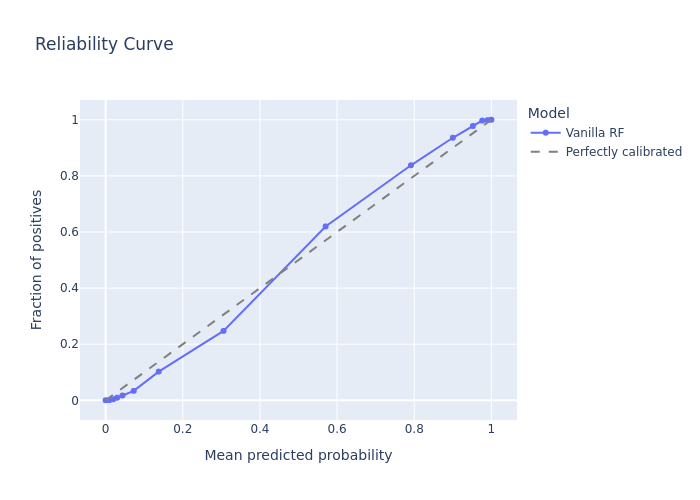

In [15]:
reliability_curve(model, X_test, y_test, n_bins=60, fig_type="png", model_name="Vanilla RF")

In [16]:
# Criar o modelo de RandomForestClassifier
model = BalancedRandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    sampling_strategy="all",
    replacement=True,
    bootstrap=False)
model.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=False, random_state=42,
                               replacement=True, sampling_strategy='all')

BalancedRandomForestClassifier

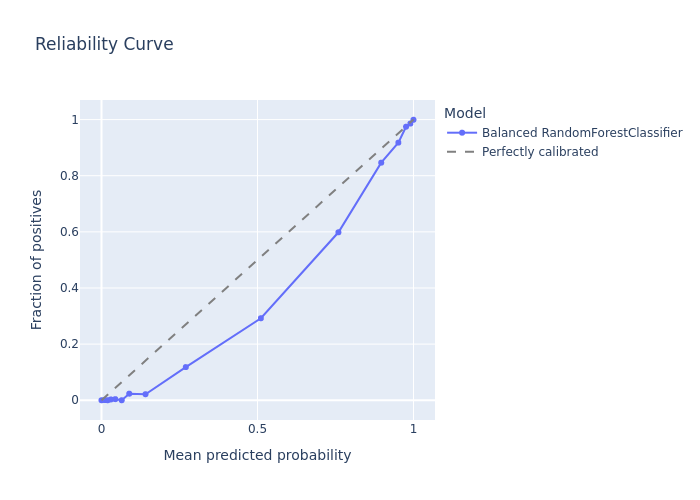

In [17]:
reliability_curve(model, X_test, y_test, n_bins=60, fig_type="png", model_name="Balanced RandomForestClassifier")

SMOTE RandomForestClassifier

In [18]:
smote = SMOTE(random_state=42) 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

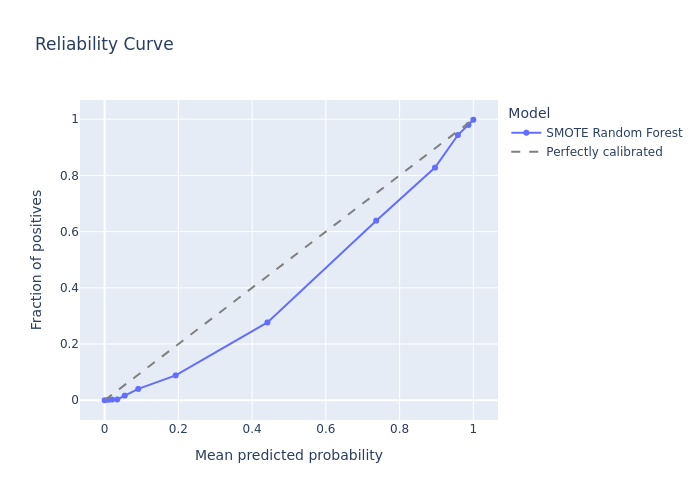

In [20]:
reliability_curve(model, X_test, y_test, n_bins=60, fig_type="png", model_name="SMOTE Random Forest")

Undersampling RandomForestClassifier

In [21]:
# Aplicar RandomUnderSampler aos dados de treino 
rus = RandomUnderSampler(random_state=42) 
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) 
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train_rus, y_train_rus) 

RandomForestClassifier(random_state=42)

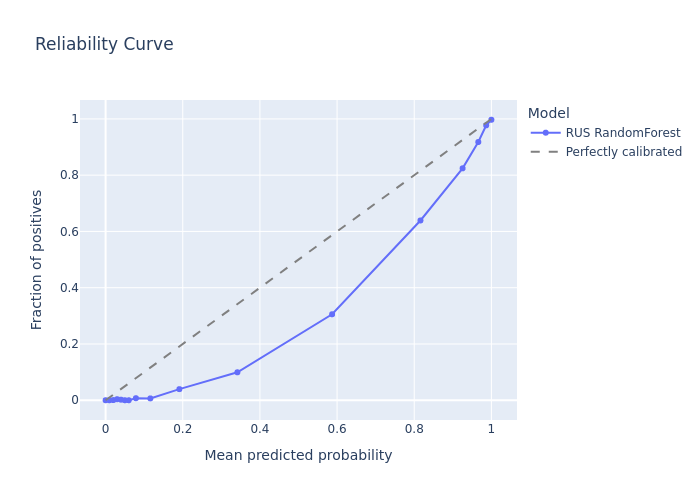

In [22]:
reliability_curve(model, X_test, y_test, n_bins=60, fig_type="png", model_name="RUS RandomForest")